In [17]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
import seaborn as sns

In [2]:
#Loading data
filename = 'Weather Training Data.csv'
df = pd.read_csv(filename)

df = df.loc[df['Location'] == 'Canberra']

df = df[["RainToday", "MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am", "Pressure9am",
         "Cloud9am", "Temp9am", "Rainfall"]]

print(df)

      RainToday  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  \
31075        No      8.0     24.3          3.4       6.3           30.0   
31076       Yes     14.0     26.9          4.4       9.7           39.0   
31077       Yes     13.7     23.4          5.8       3.3           85.0   
31078       Yes     13.3     15.5          7.2       9.1           54.0   
31079       Yes      7.6     16.1          5.6      10.6           50.0   
...         ...      ...      ...          ...       ...            ...   
33463        No     -3.6     15.7          NaN       NaN           15.0   
33464        No     -2.9     13.3          NaN       NaN           24.0   
33465        No     -2.4     14.7          NaN       NaN           15.0   
33466        No     -2.9     13.3          NaN       NaN           35.0   
33467        No     -4.3     14.5          NaN       NaN           54.0   

       Humidity9am  Pressure9am  Cloud9am  Temp9am  Rainfall  
31075         68.0       1019.7     

In [8]:
#Looking at data for missing values
print("Data and its number of missing values.")
print(df.isnull().sum())

# We remove all the places where RainToday is zero
df = df.dropna(subset=["RainToday"])

print("Data with removed RainToday data points.")
print(df.isnull().sum())

Data and its number of missing values.
RainToday        0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Pressure9am      0
Cloud9am         0
Temp9am          0
Rainfall         0
dtype: int64
Data with removed RainToday data points.
RainToday        0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Pressure9am      0
Cloud9am         0
Temp9am          0
Rainfall         0
dtype: int64


In [9]:
# We insert the mean on all NaN's in the dataset
for x in list(df.columns.values)[1:]:
    df[x] = df[x].fillna(df[x].mean())

print("Data with modified mean values.")
print(df.isnull().sum())

# We turn Yes and No into binary
df.loc[df.RainToday == "Yes", "RainToday"] = 1
df.loc[df.RainToday == "No", "RainToday"] = 0

print("Data with binary modified RainToday")
print(df.head())

# We turn the dataset into numpy array
X = df[["MinTemp", "MaxTemp", "WindGustSpeed", "Humidity9am", "Pressure9am",
        "Cloud9am", "Temp9am", "Rainfall"]].to_numpy()
print(f"Shape of data as numpy array: {X.shape}")

Data with modified mean values.
RainToday        0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Pressure9am      0
Cloud9am         0
Temp9am          0
Rainfall         0
dtype: int64
Data with binary modified RainToday
      RainToday  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  \
31075         0      8.0     24.3          3.4       6.3           30.0   
31076         1     14.0     26.9          4.4       9.7           39.0   
31077         1     13.7     23.4          5.8       3.3           85.0   
31078         1     13.3     15.5          7.2       9.1           54.0   
31079         1      7.6     16.1          5.6      10.6           50.0   

       Humidity9am  Pressure9am  Cloud9am  Temp9am  Rainfall  
31075         68.0       1019.7       7.0     14.4       0.0  
31076         80.0       1012.4       5.0     17.5       3.6  
31077         82.0       1009.5       8.0     15.4       3.6  
31078  

In [15]:
#PCA
# Subtract mean value from data
Y = X - np.ones((2380, 1)) * X.mean(axis=0)

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

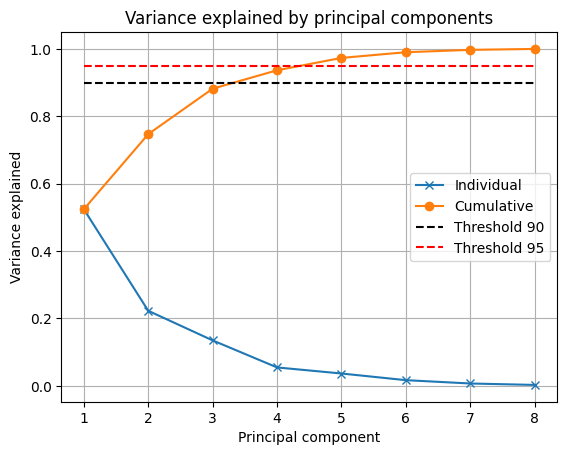

In [11]:
#Explained variance
#Different threshold values
threshold90 = 0.9
threshold95 = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, 'x-')
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), 'o-')
plt.plot([1, len(rho)], [threshold90, threshold90], 'k--')
plt.plot([1, len(rho)], [threshold95, threshold95], 'r--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual', 'Cumulative', 'Threshold 90', 'Threshold 95'])
plt.grid()
plt.show()

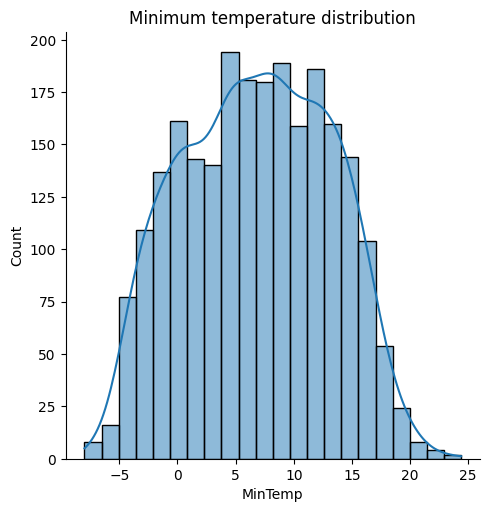

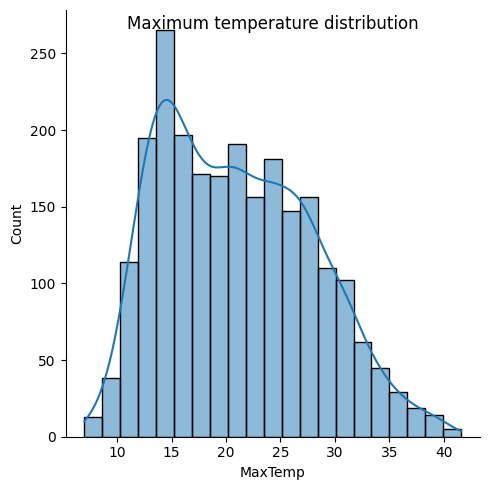

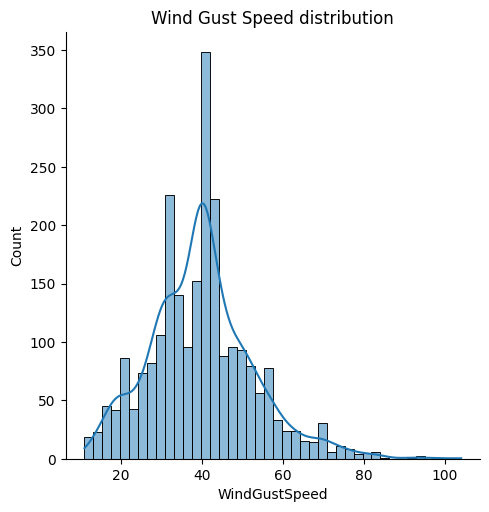

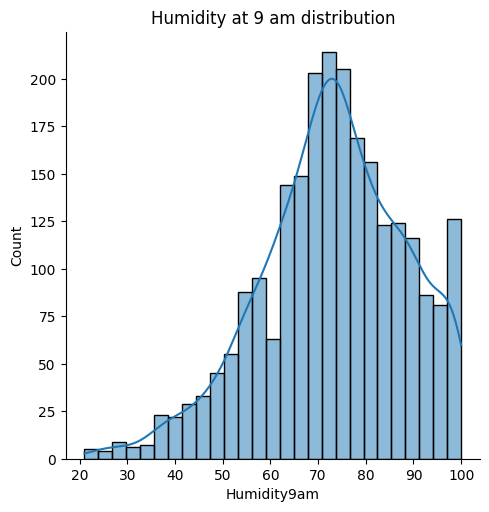

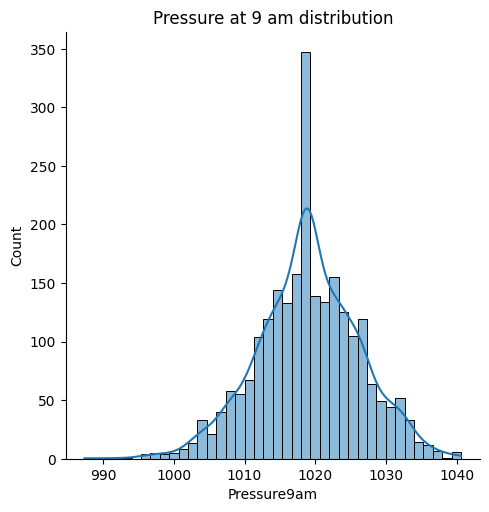

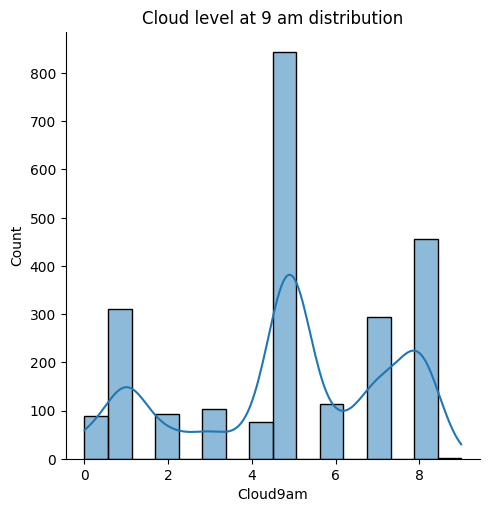

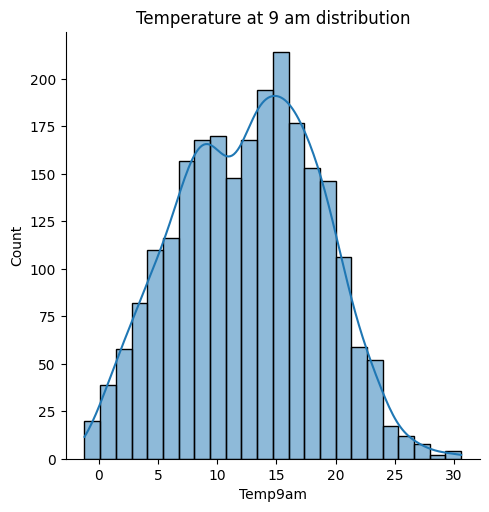

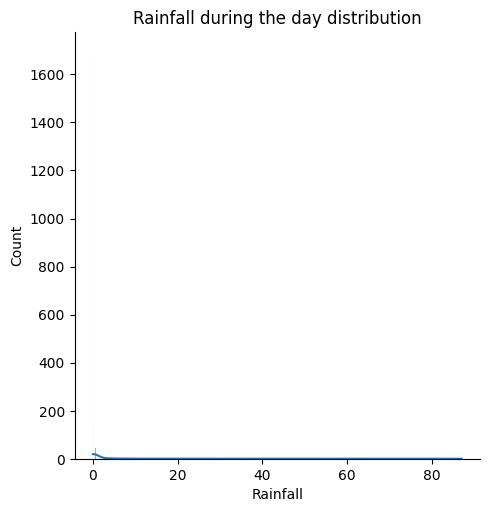

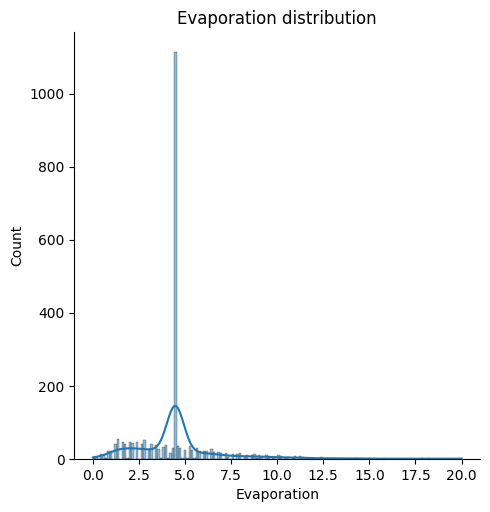

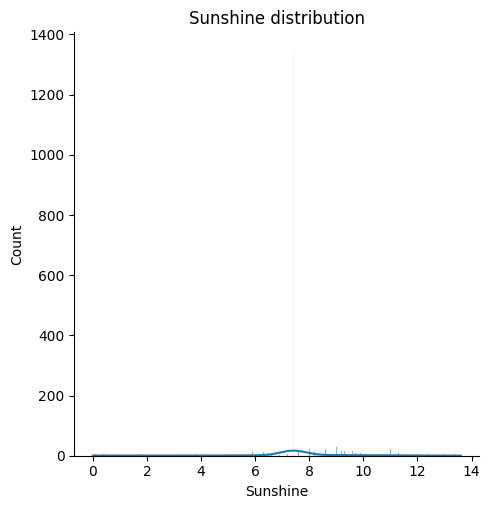

In [14]:
# We also want to do the correlation between the attributes
sns.displot(df, x="MinTemp", kde=True)
plt.title("Minimum temperature distribution")
plt.show()


sns.displot(df, x="MaxTemp", kde=True)
plt.title("Maximum temperature distribution", y=1.0, pad=-14)
plt.show()

sns.displot(df, x="WindGustSpeed", kde=True)
plt.title("Wind Gust Speed distribution")
plt.show()

sns.displot(df, x="Humidity9am", kde=True)
plt.title("Humidity at 9 am distribution")
plt.show()

sns.displot(df, x="Pressure9am", kde=True)
plt.title("Pressure at 9 am distribution")
plt.show()

sns.displot(df, x="Cloud9am", kde=True)
plt.title("Cloud level at 9 am distribution")
plt.show()

sns.displot(df, x="Temp9am", kde=True)
plt.title("Temperature at 9 am distribution")
plt.show()

sns.displot(df, x="Rainfall", kde=True)
plt.title("Rainfall during the day distribution")
plt.show()

sns.displot(df, x="Evaporation", kde=True)
plt.title("Evaporation distribution")
plt.show()

sns.displot(df, x="Sunshine", kde=True)
plt.title("Sunshine distribution")
plt.show()

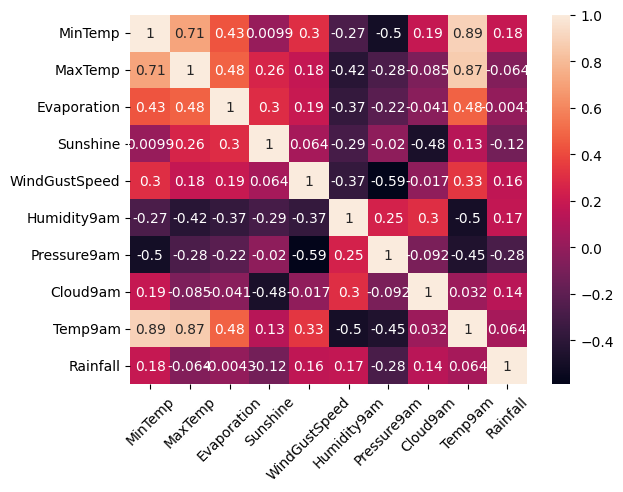

In [13]:
# We want to find the correlation
corr = df[["MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am", "Pressure9am",
          "Cloud9am", "Temp9am", "Rainfall"]].corr()

sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.show()

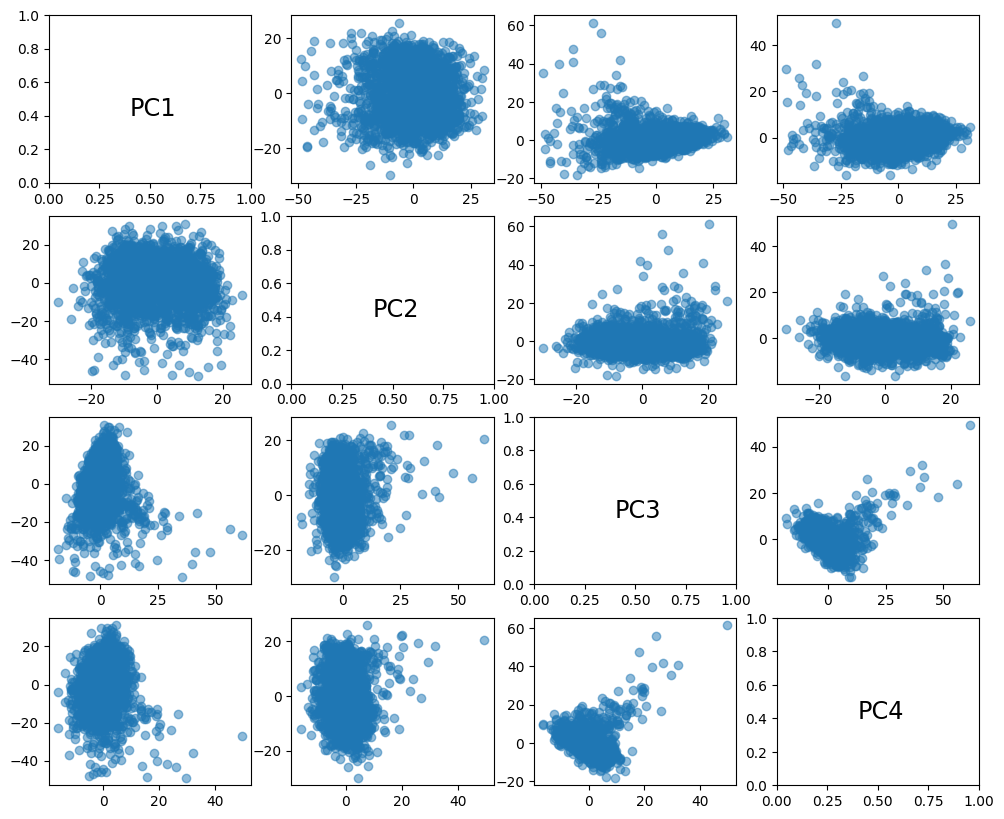

In [16]:
#PC plots

# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
Z = Y @ V

# Plot PCA of the data
f = plt.figure(figsize = (12,10))

location = 1
pca_num = 0
for x in range(1,5,1):
    for y in range(1,5,1):

        plt.subplot(4,4, location)
        if location == 1 or location == 6 or location == 11 or location == 16:
            plt.text(0.4,0.4,f'PC{x}',fontsize="xx-large")

        else:
            plt.plot(Z[:, x], Z[:, y], 'o', alpha=.5)

        location += 1

# Output result to screen
plt.show()